In [1]:
import math

import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import root_scalar
from sklearn.covariance import LedoitWolf

from hyperspectral.target import normalized_matched_filter, robust_matched_filter

/home/jpolchlopek/work/nasa-hyperspectral/src/hyperspectral/hyperspectral/math/rpca.py:6: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


### Load AOI raster

In [2]:
loaded = np.load('data/tpa_extract.npz')
extract = loaded['extract']
active = loaded['active']
dirty = loaded['dirty']

r,c,p = extract.shape
center = np.mean(extract.reshape((r*c,-1)), axis=0)
r,c, p, center.shape

(89, 85, 154, (154,))

In [3]:
target = np.load('data/tpa_spectrum.npz')['target']
target.shape

(154,)

In [4]:
background = extract.reshape((r*c,-1))[np.logical_not(dirty).flatten()]
background.shape

(6939, 154)

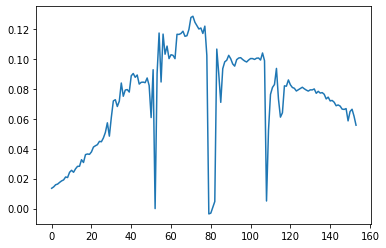

In [5]:
plt.plot(target)

#### Expected response area

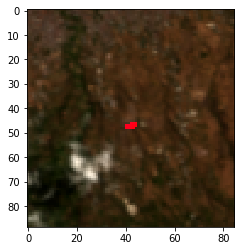

In [6]:
rgb = extract[:,:,[23,11,0]]
rgb = rgb/np.max(rgb)
rgb[active,0] = 1.0
rgb[active,1] = 0.0
plt.imshow(rgb)

### Robust Matched Filter computation

In [7]:
Σ = LedoitWolf().fit(background).covariance_

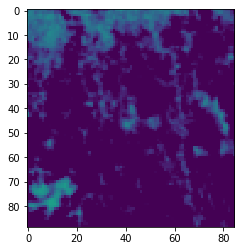

In [8]:
plt.imshow(robust_matched_filter(extract, target, Σ, ε=12e-2, center=np.mean(background,axis=0)), vmin=0.0, vmax=1.0)

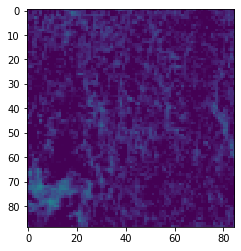

In [9]:
plt.imshow(normalized_matched_filter(extract, target, Σ, center=True), vmin=0.0, vmax=1.0)